# 1、 数据读取

In [ ]:
# 描述性统计
file="C:\\Users\\Administrator\\Desktop\\大三下学习资料\\选修课\\应用数据科学\\链家二手房\\lianjia.csv"

In [2]:
#读取表头，数据为二维列表
def py_read_csv(file_name):
    room_data=[]
    with open(file_name,encoding='utf-8') as csvfile:
        for line in csvfile.readlines():
            if line.strip() is not '':room_data.append(line.strip().split(","))
    room_header,room_data=room_data[0],room_data[1:]
    return room_header,room_data
hd,dt=py_read_csv(file)
#print(hd,dt[:5])

In [3]:
print(hd)

['Direction', 'District', 'Elevator', 'Floor', 'Garden', 'Id', 'Layout', 'Price', 'Region', 'Renovation', 'Size', 'Year']


In [4]:
#二位列表转置
def transpose(dt):    
    ndt=[]
    for i in range(len(dt[0])): 
        t = []
        for j in range(len(dt)):
            t.append(dt[j][i])
        ndt.append(t)
    return ndt
ndt=transpose(dt)
print(ndt[0][:5])#第一列direction

['东西', '南北', '南西', '南', '南']


In [5]:
#字符串转float
def strfl(seq):
    return list(map(float,seq))
for i in (3,5,7,10,11):
    ndt[i]=strfl(ndt[i])

# 2、描述性统计

In [6]:
#缺省值统计
print("共统计{}条数据".format(len(dt)))
for i in range(len(hd)):
    print("{}缺失{}个".format(hd[i],ndt[i].count('')))

共统计23677条数据
Direction缺失0个
District缺失0个
Elevator缺失8237个
Floor缺失0个
Garden缺失0个
Id缺失0个
Layout缺失0个
Price缺失0个
Region缺失0个
Renovation缺失0个
Size缺失0个
Year缺失0个


In [7]:
def standard(l):#方差公式
        s1=0  
        s2=0  
        for i in l:  
            s1+=i**2;  
            s2+=i;  
        return pow(float(s1)/len(l)-(float(s2)/len(l))**2,0.5)
def median(x):#第三个，求50%
    x = sorted(x)
    length = len(x)
    mid, rem = divmod(length, 2)    # divmod函数返回商和余数
    if rem:
        return x[:mid], x[mid+1:], x[mid]
    else:
        return x[:mid], x[mid:], (x[mid-1]+x[mid])/2
def quarter(x):#25%，75%
    return median(median(l)[0])[2],median(median(l)[1])[2]

def coun(seq):#频数统计
    counted =Counter(seq)
    for k in sorted(counted):
        print('{0} {1}'.format(k,counted[k]))

In [8]:
# 描述性统计：计数、平均值、标准差、最小值、25%、50%、75%、最大值
deshd=["count","average","std","min","max","25%","50%","70%"]
def describe(l):
    l3=[]
    l3.append((len(l)-l.count('')))
    l3.append(sum(l)/len(l))
    l3.append(standard(l))
    l3.append(min(l))
    l3.append(quarter(l)[0])
    l3.append(median(l)[2])
    l3.append(quarter(l)[1])
    l3.append(max(l))
    return l3

In [56]:
#Region频数统计
coun(ndt[8])

东城 1533
丰台 2952
亦庄开发区 469
大兴 2115
密云 12
平谷 41
怀柔 15
房山 1442
昌平 2811
朝阳 2973
海淀 2983
石景山 882
西城 2130
通州 1602
门头沟 496
顺义 1221


In [69]:
#Floor，Id,Price,Size,Year的描述性统计
ndesl=transpose(desl)
ndesl.insert(0,[nhd[i] for i in (3,5,7,10,11)])
for i in range(len(ndesl)):      # 控制行，0~2
        for j in range(len(ndesl[i])):    # 控制列
            print(ndesl[i][j], end='\t')
        print()

Floor	Id	Price	Size	Year	
count	23677	23677	23677	23677	23677	
average	12.765088482493558	101102362721.15808	610.6683194661488	99.14930100941842	2001.3265194070195	
std	7.643770382993734	565129.2628912433	411.4434176520896	50.98776121544481	9.001805787268095	
min	1.0	101088604521.0	60.0	2.0	1950.0	
max	6.0	101102245050.0	365.0	66.0	1997.0	
25%	11.0	101102507422.0	499.0	88.0	2003.0	
50%	18.0	101102651016.5	717.5	118.0	2007.0	
70%	57.0	101102751457.0	6000.0	1019.0	2017.0	


# 3、特征提取

In [ ]:
# 特征提取1：单价
PerPrice=[]
for i in range(len(dt)):
    PerPrice.append(float(ndt[-5][i])/float(ndt[-2][i]))
ndt.append(PerPrice)
nhd=['Direction', 'District', 'Elevator', 'Floor', 'Garden', 'Id', 'Layout', 'Price', 'Region', 'Renovation', 'Size', 'Year','PerPrice']

In [11]:
#特征提取2、3、4：卧室、客厅数量、卫生间数量、别墅数量
Room,Livi,Wash,Villa=[],[],[],[]
for i in range(len(dt)):
    if ndt[6][i][-1]=="卫":
       # print(ndt[6][i])
        Room.append(ndt[6][i][0])
        Livi.append(0)
        Wash.append(ndt[6][i][-2])
        Villa.append(0)
    elif ndt[6][i][-1]=="厅":
        #print(ndt[6][i])
        Room.append(ndt[6][i][0])
        Wash.append(0)
        Livi.append(ndt[6][i][-2])
        Villa.append(0)
    else:
        Room.append(0)
        Wash.append(0)
        Livi.append(0)
        Villa.append(1)
print(Room[:5],Livi[:5],Wash[:5])
ndt.append(Room)
ndt.append(Livi)
ndt.append(Wash)
ndt.append(Villa)
nhd.extend(["Room","Livi","Room","Villa"])

['3', '2', '3', '1', '2'] ['1', '1', '1', '1', '2'] [0, 0, 0, 0, 0]


In [12]:
#特征变量合集
dt=transpose(ndt)
print(nhd)
print(dt[:5])

['Direction', 'District', 'Elevator', 'Floor', 'Garden', 'Id', 'Layout', 'Price', 'Region', 'Renovation', 'Size', 'Year', 'PerPrice', 'Room', 'Livi', 'Room', 'Villa']
[['东西', '灯市口', '', 6.0, '锡拉胡同21号院', 101102647043.0, '3室1厅', 780.0, '东城', '精装', 75.0, 1988.0, 10.4, '3', '1', 0, 0], ['南北', '东单', '无电梯', 6.0, '东华门大街', 101102650978.0, '2室1厅', 705.0, '东城', '精装', 60.0, 1988.0, 11.75, '2', '1', 0, 0], ['南西', '崇文门', '有电梯', 16.0, '新世界中心', 101102672743.0, '3室1厅', 1400.0, '东城', '其他', 210.0, 1996.0, 6.666666666666667, '3', '1', 0, 0], ['南', '崇文门', '', 7.0, '兴隆都市馨园', 101102577410.0, '1室1厅', 420.0, '东城', '精装', 39.0, 2004.0, 10.76923076923077, '1', '1', 0, 0], ['南', '陶然亭', '有电梯', 19.0, '中海紫御公馆', 101102574696.0, '2室2厅', 998.0, '东城', '精装', 90.0, 2010.0, 11.088888888888889, '2', '2', 0, 0]]


# 3、数据可视化

In [13]:
#字符串画频率直方图
from collections import Counter#计算频数，返回字典，字符串做图
def ascii_histogram(seq) -> None:
    counted =Counter(seq)
    for k in sorted(counted):
        print('{0} {1}'.format(k, '+' * counted[k]))

In [50]:
#Scatter散点图 
def scale(x, o=(0, 100), i=(0, 1)):
    return (x - i[0]) / (i[1] - i[0]) * (o[1] - o[0]) + o[0]

class RangeScaler:
    def __init__(self, out_range=(0, 100), floor=None, round=True):
        self.out_range = out_range
        self.floor = floor
        self.round = round

    def fit(self, y):
        if not self.floor and self.floor != 0:
            min_ = min(y)
        else:
            min_ = self.floor
        max_ = max(y)
        self.in_range_ = (min_, max_)
        return self

    def transform(self, y):
        y = [scale(yi, self.out_range, self.in_range_) for yi in y]
        if self.round:
            y = [int(round(yi)) for yi in y]
        return y

    def fit_transform(self, y):
        self.fit(y)
        return self.transform(y)

def bin(x, b, o=(0, 100)):
    return int(b * ((x - o[0]) / (o[1] - o[0])))

class NumberBinarizer:
    '''A binarizer that cuts values into equal-width bins
    >>> x = range(10)
    >>> NumberBinarizer(4).fit_transform(x)
    [0, 0, 0, 1, 1, 2, 2, 3, 3, 3]
    '''
    def __init__(self, bins=5):
        self.bins = bins

    def fit(self, y):
        self.min_ = min(y)
        self.max_ = max(y)
        return self

    def transform(self, y):
        y = [bin(yi, self.bins, (self.min_, self.max_)) for yi in y]
        y = [yi - 1 if yi == self.bins else yi for yi in y]
        return y

    def fit_transform(self, y):
        self.fit(y)
        return self.transform(y)
    
def scatter(x, y, width=40, height=None, mark='•'):#Scatter散点图
    '''A simple scatter plot that prints to the console
    :param x: list, array or series of numeric values
    :param y: list, array or series of numeric values
    :param width: integer for the character length of the x values
    :param height: integer for the character length of the y values
    :param mark: unicode symbol to mark data values
    '''
    if not height:
        height = int(width / 3 // 1)
    matrix = [[' '] * width for _ in range(height)]
    x = RangeScaler((0, width-1)).fit_transform(x)
    y = RangeScaler((0, height-1)).fit_transform(y)
    for (xi, yi) in zip(x, y):
        matrix[yi][xi] = mark
    matrix = matrix[::-1]
    string_chart = ''
    for row in matrix:
        string_row = ''.join(row)
        string_chart += string_row
        string_chart += '\n'
    print(string_chart)
#缺点：没办法画 字符串类型变量的散点图！

In [26]:
#PerPrice字符串频率直方图
l= list(map(int,ndt[12]))
ascii_histogram(l)

1 ++++++++++++++++++++++++++++++++++++++++++++
2 +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
3 +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

In [51]:
#scatter散点图，不调用matplotlib（Price&Size）
price=list(map(float,ndt[7]))
size=list(map(float,ndt[10]))
scatter(price,size)

           •                            
                                        
                   •      •             
                                        
                •  •            •       
          •  •       •     •  • •       
       • •• • •••  •    • •  •          
      •• •••• •••••••  •        •   •   
     •••••••••••••••••••••• • •        •
   ••••••••••••••••••••••••             
 ••••••••••••••••••••                   
••••••••••••••                          
••••••••••    •• •  •     •  •          



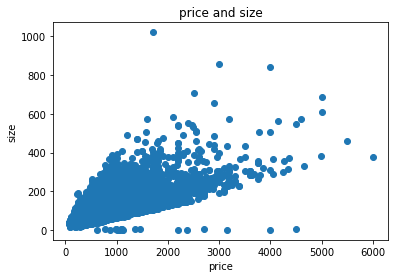

In [71]:
#scatter散点图，调用matplotlib（用于检验）
from matplotlib import pyplot as plt 
price=list(map(float,ndt[7]))
size=list(map(float,ndt[10]))
plt.title("price and size") 
plt.xlabel("price") 
plt.ylabel("size") 
plt.scatter(price,size)
plt.show()
#结论：scatter效果可以看出x，y的关系，但是不能显示坐标轴具体的数值

# 4、问题：哪个区的二手房性价比最高？

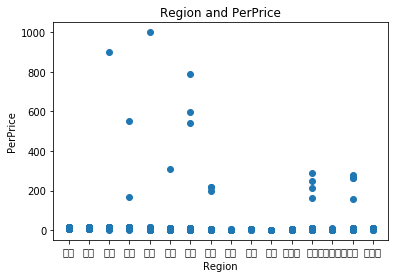

In [74]:
#思路1：观察region-PerPrice的关系
#scatter没法画字符串类型变量，因此调用matplotlib
from matplotlib import pyplot as plt 
Region=ndt[8]
size=list(map(float,ndt[12]))
plt.title("Region and PerPrice") 
plt.xlabel("Region") 
plt.ylabel("PerPrice") 
plt.scatter(Region,PerPrice)
plt.show()
#结论：【失败】字符串同样无法正常显示o(╥﹏╥)o，同时需要剔除一些异常点

In [92]:
#思路2：按Region分类的PerPrice
def sepr(j,k,name):
    l=[]
    for i in range(len(dt)):
        if ndt[j][i]==name:
            l.append(ndt[k][i])
    l=list(map(float,l))
    return sum(l)/len(l)
print("区域 平均单价")
for k in Counter(ndt[8]):
    print(k,sepr(8,12,k))
#结论：密云区的平均单价最低

区域 平均单价
东城 9.864242674082673
西城 10.688348241878161
朝阳 7.317791997398519
海淀 8.847024931364626
丰台 6.098628219668127
昌平 4.40283229225034
大兴 5.414790431709071
房山 3.948686456621132
平谷 2.749868919310225
怀柔 3.9344578806587407
密云 2.392644850850013
门头沟 4.017825116359578
顺义 4.974989672791618
亦庄开发区 4.6968527157112545
通州 5.240838536132413
石景山 5.535677204979076


# 5、问题：什么样的房子贵/便宜

In [117]:
print("装修 平均单价")
district={}
for k in Counter(ndt[9]):
     district[k]=sepr(9,12,k)
print(sorted(district.items(), key = lambda kv:(kv[1], kv[0])))

装修 平均单价
[('毛坯', 5.53523871539694), ('简装', 6.196003537817814), ('其他', 6.431619956161625), ('精装', 6.434895369412558), ('南北', 381.87916666666666)]


In [118]:
district={}
for k in Counter(ndt[1]):
    district[k]=sepr(1,12,k)
print("最便宜的5个行政区及平均单价")
a=sorted(district.items(), key = lambda kv:(kv[1], kv[0]))
print(a[:5]) 
print("最贵的5个行政区及平均单价")
print(a[-5::])

最便宜的5个行政区及平均单价
[('韩村河', 1.8066849947466126), ('房山其它', 2.2654607814153223), ('密云其它', 2.392644850850013), ('窦店', 2.5553727805502215), ('平谷其它', 2.749868919310225)]
最贵的5个行政区及平均单价
[('德胜门', 13.439167550641026), ('金融街', 13.951963570656641), ('大望路', 20.356420560690047), ('西山', 40.9855745063454), ('丽泽', 45.15973392502084)]


In [113]:
district={}
for k in Counter(ndt[4]):
    district[k]=sepr(4,12,k)
print("最便宜的5个小区")
a=sorted(district.items(), key = lambda kv:(kv[1], kv[0]))
print(a[:5]) 
print("最贵的5个小区")
print(a[-5::])

最便宜的5个小区
[('新华联科技大厦', 1.4458532562169837), ('腾龙家园二区', 1.7234042553191489), ('韩村河西小区', 1.728169530908085), ('山水汇豪苑A区', 1.793103448275862), ('东亚首航国际', 1.9206464907276266)]
最贵的5个小区
[('中间建筑一区', 168.75), ('西山美墅馆F区', 190.04646917268278), ('鸿坤林语墅', 482.59833333333336), ('首府官邸', 900.0), ('西宸原著', 1000.0)]


In [121]:
print("房型 平均单价")
district={}
for k in Counter(ndt[6]):
     district[k]=sepr(6,12,k)
for k in sorted(district.items(), key = lambda kv:(kv[1], kv[0])):
    print(k)

房型 平均单价
('5房间0卫', 1.2234042553191489)
('5室0厅', 2.4390243902439024)
('2房间0卫', 2.668181818181818)
('3房间0卫', 2.925580079230334)
('2房间1卫', 3.115200148688814)
('1房间1卫', 3.165032704188625)
('6房间4卫', 3.2583462004832815)
('1房间0卫', 3.276491753786838)
('3房间1卫', 3.3767069097231905)
('8室4厅', 3.3980582524271843)
('6房间3卫', 3.4147940988368943)
('11房间3卫', 3.508771929824561)
('4房间3卫', 3.742978372905991)
('9室1厅', 3.7518796992481205)
('6室0厅', 3.776864158594278)
('4房间2卫', 3.858897498556347)
('1房间2卫', 3.9)
('4室4厅', 3.9003600081966736)
('6室1厅', 3.9018691588785046)
('7室2厅', 3.9142007947858755)
('4房间1卫', 4.072566347378657)
('3房间3卫', 4.109603789836347)
('9室2厅', 4.126984126984127)
('8室3厅', 4.184010977366936)
('3房间2卫', 4.233887936197021)
('5室4厅', 4.279567028735913)
('5房间2卫', 4.307882867709765)
('5房间3卫', 4.346981756505381)
('8室5厅', 4.878048780487805)
('5室2厅', 4.977042805684065)
('5室3厅', 5.085908222771659)
('2房间2卫', 5.086089024931467)
('6室2厅', 5.173798143013395)
('7室3厅', 5.347721066023795)
('2室3厅', 5.3504354746215